In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [4]:
raw_df = pd.read_csv(r'd:\Dwnld\DataScience_Netology_2018-2019\Feature_Engineering\FE 2\rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [8]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [9]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  395907
Total transactions in test dataset:  94606


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
6. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

## Практика

In [10]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [25]:
raw_df_grouped = raw_df[raw_df.currency.isin([810,978,840])][
    ['cl_id', 'amount', 'currency']
].groupby(['cl_id', 'currency']).agg(['sum'])

# raw_df[~raw_df.cl_id.isin(cl_ids_test)]

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
# aggregated_dataset = raw_df_grouped.unstack()
raw_df_grouped.head(10)

amount
                       sum
cl_id currency            
0     810         64383.00
1     810        266693.13
      978           884.91
5     810        544874.63
      978            51.83
9     810        849315.09
10    810       1124343.99
11    810        427662.85
      978            84.29
14    810        448690.17

In [49]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w')
    )
    tmp_df = dataset.groupby(
        ['cl_id','day_of_transaction']
    ).size().unstack().fillna(0)
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['day_of_transaction'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'day_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H')
    ) 
    return dataset.groupby(
        ['cl_id','hour_of_transaction']
    )['hour_of_transaction'].size().unstack().fillna(0)

In [50]:
transaction_by_day_count(transactions_train).head()

day_of_transaction,day_0,day_1,day_2,day_3,day_4,day_5,day_6
cl_id,,,,,,,
0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
1,7.0,20.0,20.0,16.0,16.0,10.0,15.0
5,15.0,19.0,19.0,15.0,25.0,24.0,25.0
9,5.0,8.0,7.0,5.0,6.0,4.0,4.0
11,28.0,29.0,30.0,25.0,40.0,40.0,25.0


In [51]:
transaction_by_hour_count(transactions_train).head()

hour_of_transaction,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
cl_id,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
5,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
9,7.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0
11,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0


### Агрегирование с помощью Pandas

In [27]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    agg_df = df[['cl_id', col_to_groupby, 'amount']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [32]:
raw_df['currency'].value_counts().head(3)

810    477644
978      5536
840      1921
Name: currency, dtype: int64

Общая сумма и среднее транзакций по основным вылютам

In [31]:
df_train_currency = pd.merge(
    get_aggregated_df(transactions_train[transactions_train.currency.isin([810,978,840])], agg_type='mean', col_to_groupby='currency'),
    get_aggregated_df(transactions_train[transactions_train.currency.isin([810,978,840])], agg_type='sum', col_to_groupby='currency'),
    left_index=True,
    right_index=True,
)

In [30]:
df_train_currency.head()

currency,currency_mean_810,currency_mean_840,currency_mean_978,currency_sum_810,currency_sum_840,currency_sum_978
cl_id,,,,,,
0,12876.600000,0.0,0.000000,64383.00,0.0,0.00
1,3809.901857,0.0,26.026765,266693.13,0.0,884.91
5,4006.431103,0.0,25.915000,544874.63,0.0,51.83
9,21777.310000,0.0,0.000000,849315.09,0.0,0.00
11,2046.233732,0.0,10.536250,427662.85,0.0,84.29


In [34]:
df_train_currency.shape

(4000, 6)

Агрегации по времени суток и дням недели

In [57]:
df_train_day_and_hour = pd.merge(
    transaction_by_day_count(transactions_train),
    transaction_by_hour_count(transactions_train),
    left_index=True,
    right_index=True,
)

In [56]:
df_train_day_and_hour.head()

,day_0,day_1,day_2,day_3,day_4,day_5,day_6,00,01,02,...,14,15,16,17,18,19,20,21,22,23
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,20.0,20.0,16.0,16.0,10.0,15.0,101.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
5,15.0,19.0,19.0,15.0,25.0,24.0,25.0,124.0,0.0,0.0,...,1.0,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
9,5.0,8.0,7.0,5.0,6.0,4.0,4.0,7.0,1.0,6.0,...,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0
11,28.0,29.0,30.0,25.0,40.0,40.0,25.0,207.0,0.0,0.0,...,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0


In [55]:
df_train_day_and_hour.shape

(4000, 31)

Dataset for training

In [58]:
df_train = pd.merge(
    df_train_currency,
    df_train_day_and_hour,
    left_index=True,
    right_index=True,
    how='inner'
)

In [64]:
df_targets = raw_df[['cl_id', 'target_flag']].drop_duplicates().copy()
df_targets.index = df_targets['cl_id']
df_targets = df_targets.drop('cl_id', axis=1)
df_targets.head()

,target_flag
cl_id,
0,0
1,0
5,1
9,0
10,0


In [65]:
df_train = pd.merge(
    df_train,
    df_targets,
    left_index=True,
    right_index=True,
    how='inner'
)

In [66]:
df_train

,currency_mean_810,currency_mean_840,currency_mean_978,currency_sum_810,currency_sum_840,currency_sum_978,day_0,day_1,day_2,day_3,...,15,16,17,18,19,20,21,22,23,target_flag
cl_id,,,,,,,,,,,,,,,,,,,,,
0,12876.600000,0.0,0.000000,64383.00,0.0,0.00,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3809.901857,0.0,26.026765,266693.13,0.0,884.91,7.0,20.0,20.0,16.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0
5,4006.431103,0.0,25.915000,544874.63,0.0,51.83,15.0,19.0,19.0,15.0,...,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0,1
9,21777.310000,0.0,0.000000,849315.09,0.0,0.00,5.0,8.0,7.0,5.0,...,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,0
11,2046.233732,0.0,10.536250,427662.85,0.0,84.29,28.0,29.0,30.0,25.0,...,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0
20,5679.325844,0.0,0.000000,437308.09,0.0,0.00,6.0,10.0,15.0,13.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21,2732.916532,0.0,0.000000,338881.65,0.0,0.00,22.0,6.0,13.0,18.0,...,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0
24,10289.614545,0.0,0.000000,113185.76,0.0,0.00,0.0,3.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
25,39672.727273,0.0,0.000000,436400.00,0.0,0.00,0.0,1.0,4.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression()
X_train = df_train.drop(['target_flag'], axis=1)
y_train = df_train['target_flag']

In [69]:
clf.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve

In [71]:
y_train_predict = clf.predict_proba(X_train)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.68


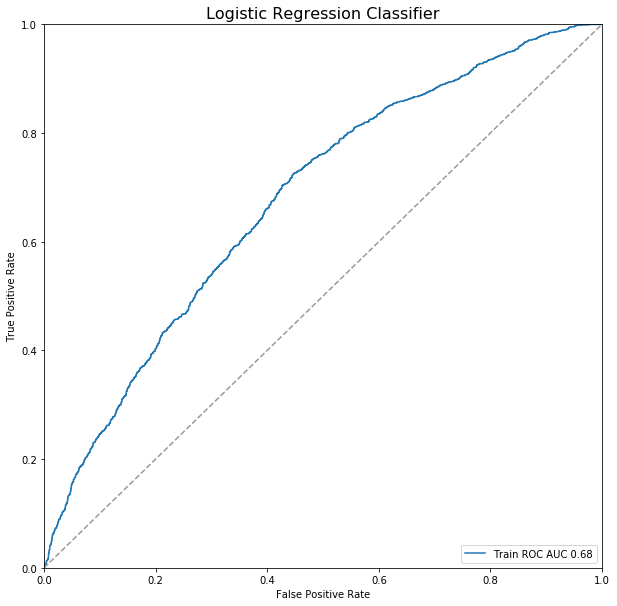

In [72]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()